In [ ]:
from utils import get_task, get_duplicates_items, get_general_report_v_4, get_general_report_v_4_version2,  general_confusion_matrix, error_tables, get_precision_recall, write_to_gsheet, export_gsheet

c:\Users\Milton\AppData\Local\Programs\Python\Python313\Lib\site-packages\dtlpy\services\api_client.py:1407: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  d = datetime.datetime.utcnow()
c:\Users\Milton\AppData\Local\Programs\Python\Python313\Lib\site-packages\dtlpy\services\api_client.py:1407: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  d = datetime.datetime.utcnow()


In [2]:
## Steps
# 1. Get tasks_id
# 2. Generate the general reports
# 3. Get the confusion matrix
# 4. Get the precision/recall
# 5. Set the score for each tagger

In [ ]:

BROAD_TASK = "6810e0d6486e677094cdb670"
GRASS_TASK = "6810eef3486e67bbf4cdd20f"


INDIVILLAGE_TASKS = [BROAD_TASK, GRASS_TASK]


In [ ]:
import pandas as pd

df_list = []
df_list_v2 = []
# for weed_type in new_tasks:
for weed_type in INDIVILLAGE_TASKS:
    task = get_task(weed_type)
    duplicates_list = get_duplicates_items()
    dict_report_df = get_general_report_v_4(task, duplicates_list)
    v2 = get_general_report_v_4_version2(dict_report_df)
    df_list.append(dict_report_df)
    df_list_v2.append(v2)

df_report_general = pd.concat(df_list)
df_report_general_2 = pd.concat(df_list_v2)

c:\Users\Milton\AppData\Local\Programs\Python\Python313\Lib\site-packages\dtlpy\services\api_client.py:1407: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  d = datetime.datetime.utcnow()


Iterate Pages: 100%|██████████| 1/1 [00:02<00:00,  2.78s/it]


c:\Users\Milton\AppData\Local\Programs\Python\Python313\Lib\site-packages\dtlpy\services\api_client.py:1407: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  d = datetime.datetime.utcnow()


Iterate Pages: 100%|██████████| 1/1 [00:02<00:00,  2.99s/it]


In [ ]:
# Get analytics report from Drive

service_file_path = r'G:\My Drive\credentials_taranis.json'
spreadsheet_id = '1ugF9jxaqM1WAxRMsoPqXzW5R-1jwNxMy6zIjt_i14GY'
sheet_name_report = 'general_report_new_report'


write_to_gsheet(service_file_path, spreadsheet_id, sheet_name_report, df_report_general_2)
# write_to_gsheet(service_file_path, spreadsheet_id, sheet_name_report_2, v2)


c:\Users\Milton\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygsheets\authorization.py:119: DeprecationWarning: The argument service_file is deprecated. Use service_account_file instead.
  warnings.warn('The argument {} is deprecated. Use {} instead.'.format(key, _deprecated_keyword_mapping[key])


Report updated 12/05/2025 10:54:13


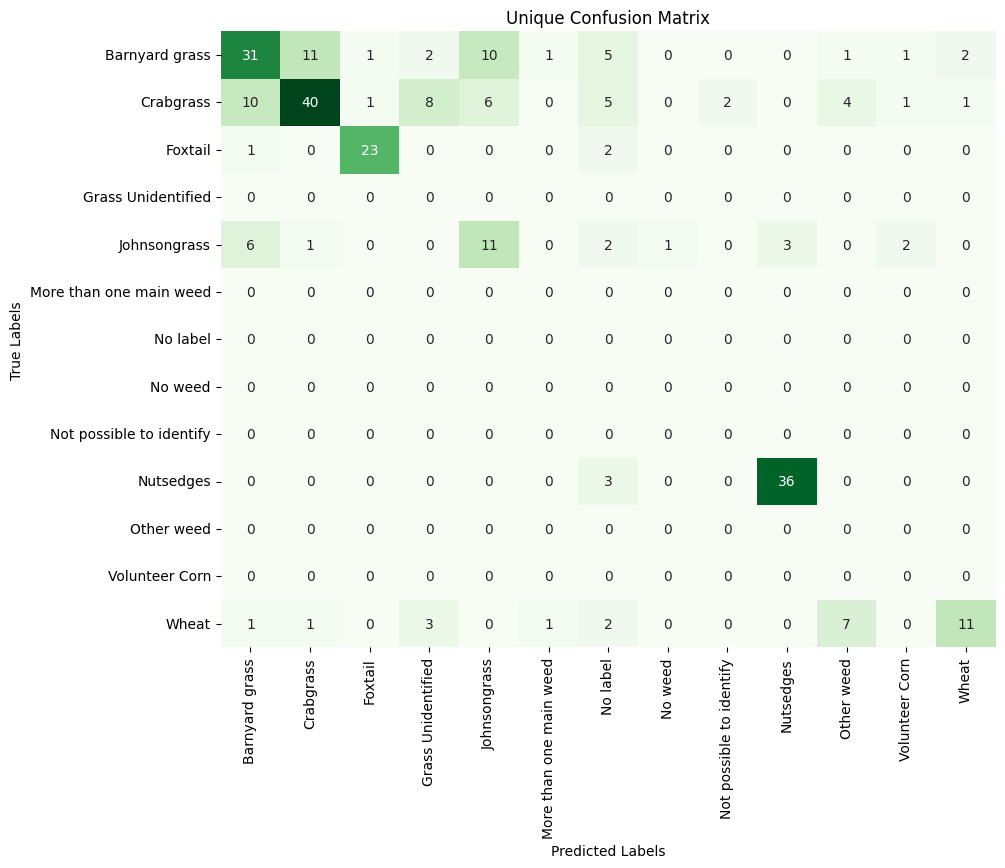

In [ ]:
## Getting general matrix

general_confusion_matrix(df_report_general[:20])

In [22]:


## Getting users
list_users = list(df_report_general.columns[7:-2])

print (f"Precision/recall of users_1")


## Getting precision/recall
user_1 = list_users[1]
get_precision_recall(df_report_general, user_1)


Precision/recall of users_1
Label precision generated


,Label,Count,Precision,Recall,f1_score
0,Barnyard grass,5,1.00,0.60,0.75
1,Nutsedges,3,1.00,1.00,1.00
2,Crabgrass,7,0.86,0.86,0.86
3,Johnsongrass,2,0.50,0.50,0.50
4,Wheat,2,0.50,0.50,0.50
5,Foxtail,2,1.00,1.00,1.00
6,Pigweed,1,0.00,0.00,0.00
7,Common lambsquarters,2,0.67,1.00,0.80
8,Morning Glory,2,1.00,0.50,0.67
9,Mexican fireweed,1,0.00,0.00,0.00


In [ ]:
## Getting error table for user

error_tables(df_report_general, user_1)

Tester report generated


,Label_ground_truth,aner.koltin@taranis.com,# of items,Percentage,Image_Ids
0,Barnyard grass,Barnyard grass,3,60.00%,"[740244, 328029, 302173]"
1,Barnyard grass,Crabgrass,1,20.00%,[333953]
2,Barnyard grass,Wheat,1,20.00%,[464929]
3,Canada Thisltle,Sowthisles,1,100.00%,[311519]
4,Cockleburs,Cockleburs,1,50.00%,[394488]
5,Cockleburs,Common lambsquarters,1,50.00%,[903906]
6,Common Ragweed,Common Ragweed,2,100.00%,"[105987, 311141]"
7,Common lambsquarters,Common lambsquarters,2,100.00%,"[574076, 169352]"
8,Crabgrass,Crabgrass,6,85.71%,"[265941, 580575, 679772, 348698, 740930, 687553]"
9,Crabgrass,Johnsongrass,1,14.29%,[813350]
